## This tutorial consists :
* What is feature engineering?
* How to handle missing values.
* How to handle categorical features.
* How to handle numerical/continuous features.
* Creating polynomial features.
* Normalization of features.
* Working with date/time features
* Working with latitudes and longitudes

## What is Feature Engineering ?

* It is a process of using data's domain knowledge to create feature to make machine learning algorithms to work.
* It consists extracting import data from raw data and transforming them into formats that are suitable for machine learning.

### Preparing our Data Sets

We use two data sets for this tutorial
*  Loan Default Prediction dataset
*  Sendy Logistics dataset by Sendy

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Silence the unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


In [6]:
# load the loan data sets
loan_demographics = pd.read_csv('traindemographics.csv')
loan_prev = pd.read_csv('trainprevloans.csv')
loan_perf = pd.read_csv('trainperf.csv')

#load logistics dataset
sendy_data = pd.read_csv('Train.csv')

In [7]:
# read first five data
loan_demographics.head().T

,0,1,2,3,4
customerid,8a858e135cb22031015cbafc76964ebd,8a858e275c7ea5ec015c82482d7c3996,8a858e5b5bd99460015bdc95cd485634,8a858efd5ca70688015cabd1f1e94b55,8a858e785acd3412015acd48f4920d04
birthdate,1973-10-10 00:00:00.000000,1986-01-21 00:00:00.000000,1987-04-01 00:00:00.000000,1991-07-19 00:00:00.000000,1982-11-22 00:00:00.000000
bank_account_type,Savings,Savings,Savings,Savings,Savings
longitude_gps,3.31922,3.3256,5.7461,3.36285,8.45533
latitude_gps,6.5286,7.1194,5.56317,6.64249,11.9714
bank_name_clients,GT Bank,Sterling Bank,Fidelity Bank,GT Bank,GT Bank
bank_branch_clients,NaN,NaN,NaN,NaN,NaN
employment_status_clients,NaN,Permanent,NaN,Permanent,Permanent
level_of_education_clients,NaN,NaN,NaN,NaN,NaN


In [8]:
sendy_data.sample(3).T


,11557,16803,7093
Order No,Order_No_26327,Order_No_8659,Order_No_15045
User Id,User_Id_718,User_Id_1578,User_Id_2636
Vehicle Type,Bike,Bike,Bike
Platform Type,3,3,1
Personal or Business,Business,Business,Personal
Placement - Day of Month,9,6,29
Placement - Weekday (Mo = 1),5,2,5
Placement - Time,4:07:24 PM,11:23:41 AM,12:53:43 PM
Confirmation - Day of Month,9,6,29
Confirmation - Weekday (Mo = 1),5,2,5


### How to handle missing values

The choice of technique is dependent on the type of features you have. For categorical features, you can do things like:
* <strong>Mode filling</strong>: Fill missing values with the most popular/frequent/modal class
* <strong>Temporal filling (forward or backward fill)</strong>: Fill missing values with the preceding value (top-down) or with the succeeding value (bottom-up).
* <strong>Encoding and fill</strong>: In this method, you can encode the values using different strategies, and then fill with either the mean, mode, or the median.

In [11]:
# check missing values
loan_demographics.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [12]:
loan_demographics['employment_status_clients'].value_counts()

Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [14]:
# fill the na values pf 'employment_status_clients' with mode of that column i.e 'Permanent'
loan_demographics['employment_status_clients'] = loan_demographics['employment_status_clients'].fillna('Permanent')


For Numerical features, we can also do things like:
* Filling with mean, mode, or median.
* Temporal filling (backward or forward filling).
* Use machine learning models: Train a machine learning model to learn the most appropriate fill values.

In [15]:
# to illustrate use Sandy logistic data
mean_df = round(sendy_data['Temperature'].mean())
mode_df = round(sendy_data['Temperature'].mode()[0]) #return mode as well as index of the mode
median_df = round(sendy_data['Temperature'].median())

# fill with mean
print("Filling with mean value of {}".format(mean_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(mean_df)

# fill with mode
print("Filling with modal value of {}".format(mode_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(mode_df)

# fill with median
print("Filling with modal value of {}".format(median_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(median_df)


Filling with mean value of 23
Filling with modal value of 25.0
Filling with modal value of 24


### Use modeling to fill missing values

To demonstrate filling with modeling, we’ll use the feature Precipitation in millimeters) in the Sendy dataset. But first, we need to select features that correlate with it. That is, feature(s) that can help predict Precipitation in millimeters.

The Seaborn heatmap plot can help us decide. We demonstrate this below.

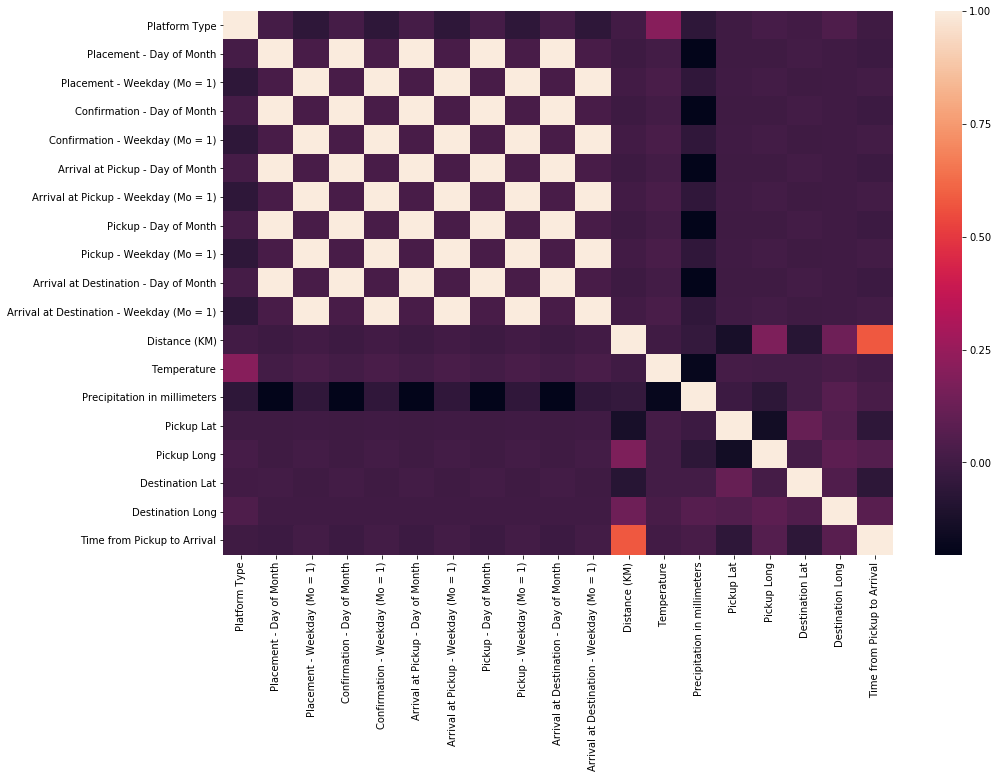

In [16]:
# plot heat map
plt.figure(figsize = (15, 10))
sns.heatmap(sendy_data.corr())

From the heatmap plot above, we can see that the majority of the features do not really correlate with Precipitation in millimeters. We can make use of the last three features (Destination Lat, Destination Long and Time from Pickup to Arrival), as these show little correlation. Let’s demonstrate this below:

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

to_train = ['Precipitation in millimeters', 'Destination Lat', 'Destination Long', 'Time from Pickup to Arrival']
temp_df = sendy_data[to_train]

# Split dataset with missing values and no missing values as test and train set respectively.
x_train = temp_df[temp_df['Precipitation in millimeters'].notnull()].drop(columns='Precipitation in millimeters')
y_train = temp_df[temp_df['Precipitation in millimeters'].notnull()]['Precipitation in millimeters']
x_test = temp_df[temp_df['Precipitation in millimeters'].isnull()].drop(columns='Precipitation in millimeters')

# fit a simple linear model to the dataset
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

# print fill values
print(np.round(pred, 5))

[8.03056 8.18609 7.86142 ... 8.46164 7.45028 8.60717]


The above process consists :
* First, we import and use a simple linear regression model.
* We save the correlated features as observed from the heatmap to a list called to_train.
* We create a train-test dataset from these features, where the train dataset contains no missing values and the test dataset contains the missing values we want to fill.
* Finally, we fit the model, make predictions on the test set, and use the predictions to fill in the missing values.    

Alternatively, you can use the IterativeImputer function in the sklearn.experimental module of the sklearn library to automatically fill missing values. We demonstrate this below:

In [19]:
#get the index of missing so we can some of the values used for filling
missing_indx = list(sendy_data['Temperature'][sendy_data['Temperature'].isna()].index)
missing_indx

[]

In [22]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Run the imputer with a simple Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(n_estimators=5), max_iter=5, random_state=1)
to_train = ['Temperature', 'Destination Lat', 'Destination Long','Time from Pickup to Arrival']

#perform filling
sendy_data[to_train] = pd.DataFrame(imp.fit_transform(sendy_data[to_train]), columns=to_train)

#display some of the filled values
sendy_data['Temperature'].isnull().sum()

0

* First, we explicitly require and enable the IterativeImputer function. This must be done before you can use it.
* Next, we import a RandomForest model and create an imputer object by passing the RandomForest model.
* Next, we specify the list of correlated features as a Python list.
* Finally, we fit transform and convert the result to a Pandas dataframe.

### How to handle categorical features

Categorical features are features that can take on values from a limited set. For example, the relative hotness of a place/thing (hot, hotter, hottest) or star ratings for an application (1,2,3,4,5). In regards to our dataset, features like level_of_education_clients in the loan_demographics dataset is a categorical feature containing classes like Secondary, Graduate, Post-Graduate, and Primary.

Machine learning models cannot work with categorical features the way they are. These features must be converted to numerical forms before they can be used. The process of converting categorical features to numerical form is called encoding.

There are numerous types of encoding, and the choice of which kind to use is mostly dependent on the categorical type. So first, let’s understand the different categorical feature types.

#### Types of categorical features

* Ordinal Categorical Features: Ordinal categorical features have a natural ordered category. That is, one class is higher than another. For example, star ratings (1,2,3,4,5), where class 5 is a higher rating than 4/3/2/1.

#### What encoding scheme to use and when to use it

* <strong>Manual Encoding of Ordinal Feature:</strong> If the classes in a categorical feature are ordinal, and the unique values are small, then you can manually assign labels that have some form of ordering. Let’s demonstrate this below using the level_of_education_clients feature in the loan demographic dataset. This feature has some form of ordinality as the class Post-Graduate is higher than Graduate/Secondary/Primary classes.

In [23]:
# illustration
loan_demographics['level_of_education_clients'].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [24]:
#use a simple map function
map_education = {"Primary" : 1, "Secondary": 2, "Graduate": 3, "Post-Graduate": 4}
    
loan_demographics['level_of_education_clients'] = loan_demographics['level_of_education_clients'].map(map_education)
loan_demographics['level_of_education_clients'].value_counts()


3.0    420
2.0     89
4.0     68
1.0     10
Name: level_of_education_clients, dtype: int64

* First, we create a dictionary mapping classes to their labels. Here, the highest class (Post-Graduate) is assigned the highest number.
* Next, we use the Pandas map function to find and replace every class with its corresponding label.

* <strong>automated encoding :</strong> we’ll use an efficient library called categorical_encoders. This library offers numerous encoding schemes out of the box and has first-hand support for Pandas dataframes.

<strong>Label Encoding:</strong> If you have a large number of classes in a categorical feature, you can use label encoding. Label encoding assigns a unique label (integer number) to a specific class. We demonstrate this using two features (bank_name_clients and bank_branch_clients) with large numbers of unique classes, 18 and 45 respectively.

In [27]:
#Check the number of unique classes
cat_cols = loan_demographics.select_dtypes(include='object').columns
for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(loan_demographics[col].nunique())
    print('--------------------------')

Number of classes in customerid
4334
--------------------------
Number of classes in birthdate
3297
--------------------------
Number of classes in bank_account_type
3
--------------------------
Number of classes in bank_name_clients
18
--------------------------
Number of classes in bank_branch_clients
45
--------------------------
Number of classes in employment_status_clients
6
--------------------------


In [29]:
! pip install category_encoders
import category_encoders as ce

#Label encoding
cat_cols = ['bank_name_clients', 'bank_branch_clients']
encoder = ce.OrdinalEncoder(cols=cat_cols)
loan_demographics = encoder.fit_transform(loan_demographics)

* First, we save the categorical columns we want to encode into a list.
* Next, we create the encoder object.
* Finally, we fit-transform the dataset.

<strong> One-Hot Encoding:</strong> One-hot encoding uses binary values to represent classes. It creates a feature per category, and can quickly become inefficient as the number of classes in the categorical feature increases. We demonstrate how to use this below:

In [33]:
cats = ['bank_account_type','level_of_education_clients']
one_hot_enc = ce.OneHotEncoder(cols=cats)
loan_demographics = one_hot_enc.fit_transform(loan_demographics)
loan_demographics.head().T

KeyError: 'bank_account_type'

<strong>Hash Encoding:</strong> Hash encoding or feature hashing is a fast and space-efficient way of encoding features. It’s very efficient for categorical features with large numbers of classes. A hash encoder works by applying a hash function to the features. We demonstrate how to use this below.

In [34]:
cat_cols = ['bank_name_clients', 'bank_branch_clients']
hash_enc = ce.HashingEncoder(cols=cat_cols, n_components=10)
loan_demographics = hash_enc.fit_transform(loan_demographics)
loan_demographics.head()

,customerid,birthdate,bank_account_type_1,bank_account_type_2,bank_account_type_3,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients_1,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4,level_of_education_clients_5
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,1,0,0,3.319219,6.528604,1,1,Permanent,1,0,0,0,0
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,1,0,0,3.325598,7.119403,2,1,Permanent,1,0,0,0,0
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,1,0,0,5.746100,5.563174,3,1,Permanent,1,0,0,0,0
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,1,0,0,3.362850,6.642485,1,1,Permanent,1,0,0,0,0
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,1,0,0,8.455332,11.971410,1,1,Permanent,1,0,0,0,0


* First, we specify the features we want to hash encode.
* Next, we create a hash encoder object and specify the length of the hash vector to be used.
* Finally, we fit-transform the dataset.

<strong>Target Encoding:</strong> In target encoding, we calculate the average of the target value by a specific category and replace that categorical feature with the result. Target encoding helps preserve useful properties of the feature and can sometimes help improve classification models—however, it can sometimes lead to severe overfitting.
To demonstrate target encoding, we’ll use the loan performance dataset (loan_perf). The target of interest in this dataset is the good_bad_flag feature, and the task is to predict if a customer will repay a loan or not. The feature good_bad_flag is represented as a categorical feature, so we first convert it to numerical form, as shown below:

In [35]:
map_target = {"Good": 0, "Bad": 1}
loan_perf['good_bad_flag'] = loan_perf['good_bad_flag'].map(map_target)

Next, we’ll target encode the feature loannumber. This feature is numeric in nature, but can be treated as a categorical feature because it has a limited number of classes.

In [36]:
target_enc = ce.TargetEncoder(cols=['loannumber'])
loan_perf = target_enc.fit_transform(X=loan_perf, y=loan_perf['good_bad_flag'])
loan_perf.head().T

,0,1,2,3,4
customerid,8a2a81a74ce8c05d014cfb32a0da1049,8a85886e54beabf90154c0a29ae757c0,8a8588f35438fe12015444567666018e,8a85890754145ace015429211b513e16,8a858970548359cc0154883481981866
systemloanid,301994762,301965204,301966580,301999343,301962360
loannumber,0.201835,0.249103,0.162698,0.267164,0.166667
approveddate,2017-07-25 08:22:56.000000,2017-07-05 17:04:41.000000,2017-07-06 14:52:57.000000,2017-07-27 19:00:41.000000,2017-07-03 23:42:45.000000
creationdate,2017-07-25 07:22:47.000000,2017-07-05 16:04:18.000000,2017-07-06 13:52:51.000000,2017-07-27 18:00:35.000000,2017-07-03 22:42:39.000000
loanamount,30000,15000,20000,10000,40000
totaldue,34500,17250,22250,11500,44000
termdays,30,30,15,15,30
referredby,NaN,NaN,NaN,NaN,NaN
good_bad_flag,0,0,0,0,0


There are many more encoding schemes (binary encoders, count Encoders, leave one out encoders, CatBoost encoders etc.) that you can try out for your use cases. A good place to learn about them is in the official documentation of the categorical_encoder library.

### How to handle numerical/continuous features

Feature engineering on numerical data mostly depends on domain knowledge. Some of the things we can do here are:

<strong>Log Transformation:</strong> Log transformation helps to center (or in statistical terms normally distribute) data. This strategy can help most machine learning models perform better.

Log transformations are mostly performed on skewed features. Features can either be left or right skewed. Skewness can be easily checked by visualization. To demonstrate log transformation, we will use the Distance (KM) feature in the Sendy dataset, as this feature is right skewed.

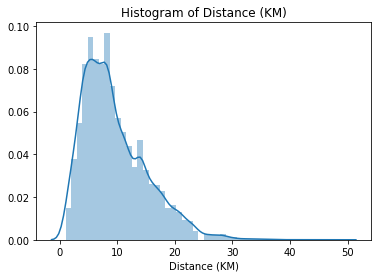

In [37]:
# plot histogram to see skewness
sns.distplot(sendy_data['Distance (KM)'])
plt.title("Histogram of Distance (KM)")
plt.show()

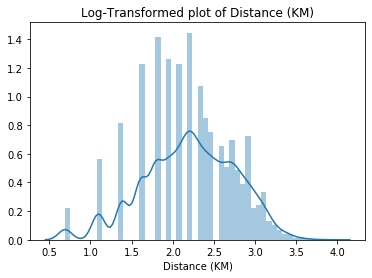

In [38]:
# plot the same data using log transformation
sendy_data['Distance (KM)'] =  np.log1p(sendy_data['Distance (KM)'])
sns.distplot(sendy_data['Distance (KM)'])
plt.title("Log-Transformed plot of Distance (KM)")
plt.show()

<strong>Using Domain Knowledge:</strong> If you have domain expertise or have someone with domain expertise on your team, you can come up with new features that can greatly help your machine learning models. We demonstrate this by creating some new features from the loan dataset, as shown below.

* Interest elapsed: Interest elapsed is a feature we create from the difference between the totaldue and the loanamount.

In [39]:
loan_prev['interest_elapsed'] = loan_prev['totaldue'] - loan_prev['loanamount']

*  Loan count: We can calculate the total number of loans collected by a customer by aggregating loan numbers.

In [40]:
#Groupby customer id and calculate their total loans taken
loannumber_count = loan_prev.groupby(by='customerid').agg(['count'])[['loannumber']].reset_index()

#merge back to dataset on customer_id
loan_prev = loan_prev.merge(right=loannumber_count, how='left', on='customerid')
loan_prev.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,interest_elapsed,"(loannumber, count)"
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,3000.0,11
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,3000.0,11
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,3800.0,11
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1500.0,6
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1500.0,2


* Speed: From Physics, we know that speed is Distance per unit of Time— therefore, we can create a new feature (Speed) in the Sendy dataset from the features Distance (KM) and Time from Pickup to Arrival.


In [41]:
#create feature speed in sendy dataset
sendy_data['speed'] = sendy_data['Distance (KM)'] / sendy_data['Time from Pickup to Arrival']
sendy_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


### Polynomial (Cross) Features

Polynomial features create interactions among features. They help to capture relationships among independent variables and can help decrease the bias of a machine learning model, as long as it’s not contributing to massive overfitting.

We can create polynomial/cross features manually by simply adding, multiplying, or dividing features with each other. In this article, we’re going to use the Polynomial Feature module present in the sklearn library.

We will create polynomial features from the loannumber, totaldue, and termdays features in the loan previous dataset, as shown below.

In [42]:
#Use Sklearn Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
to_cross = ['loannumber', 'totaldue', 'termdays']
crossed_feats = poly.fit_transform(loan_prev[to_cross].values)

#Convert to Pandas DataFrame and merge to original dataset
crossed_feats = pd.DataFrame(crossed_feats)
loan_prev = pd.concat([loan_prev, crossed_feats], axis=1)


* First, we import the PolynomialFeatures function from sklearn
* Next, we create an object from it. Here, we can specify the degree of interaction (defaults to 2).
* Next, we specify the features we want to cross (defaults to all).
* Next, we perform crossing using the fit-transform method.
* PolynomialFeatures returns a NumPy array object, so we convert this to a Pandas dataframe and then merge with the original dataset (loanprev).

### Normalization of Features

Normalization helps change the values of numeric features to a common scale, without distorting differences in the range of values or losing information. Normalization is very important for distance-based models like KNNs, and it also helps speed up training in neural networks.

ome normalization functions available in sklearn include:
* StandardScaler: Standardize features by subtracting the mean and scaling to unit variance.
* RobustScaler: Scale features using statistics that are robust to outliers.
* MinMaxScaler: Normalize features by scaling each feature to a specified range (range depends on you!).

In [43]:
from sklearn.preprocessing import StandardScaler

feats = ['loannumber', 'totaldue', 'termdays']
sc = StandardScaler()
sc_data = sc.fit_transform(loan_prev[feats])
sc_data

array([[-0.67377132, -0.62877649,  0.30213166],
       [ 1.48047238, -0.62877649,  0.30213166],
       [ 1.17272328,  0.40432506,  0.30213166],
       ...,
       [-0.05827312, -0.62877649,  0.30213166],
       [-0.98152042, -0.62877649,  0.30213166],
       [-0.67377132, -0.62877649,  0.30213166]])

In [44]:
from sklearn.preprocessing import RobustScaler
robsc = RobustScaler()

rb_data = robsc.fit_transform(loan_prev[feats])
rb_data

array([[-0.25      ,  0.        ,  0.        ],
       [ 1.5       ,  0.        ,  0.        ],
       [ 1.25      ,  0.83076923,  0.        ],
       ...,
       [ 0.25      ,  0.        ,  0.        ],
       [-0.5       ,  0.        ,  0.        ],
       [-0.25      ,  0.        ,  0.        ]])

In [45]:
from sklearn.preprocessing import MinMaxScaler

minsc = MinMaxScaler(feature_range=(0,2))
minmax_data = minsc.fit_transform(loan_prev[feats])
minmax_data

array([[0.08      , 0.29543697, 0.4       ],
       [0.64      , 0.29543697, 0.4       ],
       [0.56      , 0.6295437 , 0.4       ],
       ...,
       [0.24      , 0.29543697, 0.4       ],
       [0.        , 0.29543697, 0.4       ],
       [0.08      , 0.29543697, 0.4       ]])

### Working with date features

Date features are a popular type of feature present in many datasets. These features are temporal in nature and require specific feature extraction techniques. There are numerous things we can do with temporal features, some of which we briefly demonstrate below.

<strong>Time Elapsed:</strong> Time elapsed is the difference in time between two dates. We demonstrate this below by calculating the seconds elapsed between the approveddate and creationdate features in the loan performance dataset.

In [46]:
#First convert to pandas datetime format
loan_perf['approveddate'] = pd.to_datetime(loan_perf['approveddate'])
loan_perf['creationdate'] = pd.to_datetime(loan_perf['creationdate'])
loan_perf['date_elapsed_in_secs'] = (loan_perf['approveddate'] - loan_perf['creationdate']) / np.timedelta64(1,'s') #can subtitute with [h,m,s]
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_secs
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,0,3609.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,0,3623.0
2,8a8588f35438fe12015444567666018e,301966580,0.162698,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,0,3606.0
3,8a85890754145ace015429211b513e16,301999343,0.267164,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,0,3606.0
4,8a858970548359cc0154883481981866,301962360,0.166667,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,0,3606.0


Extract Date Features: We demonstrate below how to extract features like days, weeks, hours, seconds, etc:


In [47]:
#First convert to pandas datetime format
loan_perf['approveddate'] = pd.to_datetime(loan_perf['approveddate'])

#use pandas built in functions
loan_perf['approved_day'] = loan_perf['approveddate'].dt.day
loan_perf['approved_week'] = loan_perf['approveddate'].dt.week
loan_perf['approved_hour'] = loan_perf['approveddate'].dt.hour


<strong>Period of the day:</strong> We can extract the period of the day (morning, afternoon, evenings) from a date feature by manually mapping the hours of a day to the period. We demonstrate this below.

In [48]:
def map_hours(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    else:
        return 'evening'
    
loan_perf['period_of_day'] = loan_perf['approved_hour'].map(map_hours)
loan_perf.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_secs,approved_day,approved_week,approved_hour,period_of_day
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,0,3609.0,25,30,8,morning
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,0,3623.0,5,27,17,evening
2,8a8588f35438fe12015444567666018e,301966580,0.162698,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,0,3606.0,6,27,14,afternoon
3,8a85890754145ace015429211b513e16,301999343,0.267164,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,0,3606.0,27,30,19,evening
4,8a858970548359cc0154883481981866,301962360,0.166667,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,0,3606.0,3,27,23,evening


### Working with latitudes and longitudes

Geo-based features are a class of features present in range of datasets. These features contain records about the geographical location of a place/point in space. Features like Longitudes, Latitudes, and Address are geo-features that need to be engineered.

There are numerous things that we can do with latitude and longitude features. We can use libraries like Geojson or Geopy to convert these numerical values to physical addresses on a map.

* Manhattan distance: The Manhattan distance is the sum of the horizontal and vertical distance between two points. Let’s demonstrate this below using the Sendy dataset:


In [49]:
#Manhattan distnace
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = np.abs(lat2 -lat1)
    b = np.abs(lng1 - lng2)
    return a + b
sendy_data['manhattan_dist'] = manhattan_distance(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                               sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)
sendy_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,manhattan_dist
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.002160,0.017978
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.001422,0.141406
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,23.0,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.003047,0.022588
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.001717,0.061487
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.001897,0.046143


 * Haversine distance: The Haversine distance is the great-circle distance between two points on a sphere, given their longitudes and latitudes. It’s very important in navigation.

In [50]:
#Haversine distance
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
sendy_data['haversine_dist'] = haversine_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)
sendy_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,manhattan_dist,haversine_dist
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.002160,0.017978,1.930333
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.001422,0.141406,11.339849
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.003047,0.022588,1.880079
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.001717,0.061487,4.943458
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.001897,0.046143,3.724829


* Bearing: The bearing is the compass direction used to travel from a starting point, and must be within the range 0 to 360.

In [52]:
#Bearing
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
sendy_data['bearing'] = bearing_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)
sendy_data.head()


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,manhattan_dist,haversine_dist,bearing
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.002160,0.017978,1.930333,-2.076903
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.001422,0.141406,11.339849,-56.392163
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.003047,0.022588,1.880079,-64.183866
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.001717,0.061487,4.943458,-57.091553
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.001897,0.046143,3.724829,148.114398


### Summary

Feature engineering is essential and is often the difference between a good machine learning model and the best machine learning model.

In this tutorial, we have learned about some of the techniques and tools for performing feature engineering. We started by defining feature engineering, then looked at ways for handling missing values.

Next, we explored some encoding techniques for categorical features, and then, various ways for handling numerical features, where we specifically talked about log transformations, polynomial/cross features, and the use of domain expertise in creating new features.

Then, we looked at some normalization strategies available in sklearn, how to work with date features, and finally, how to handle geo features like latitude and longitude.

Thanks !